# 1. Importing Data and Libraries:

In [41]:
!pip install ucimlrepo

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

In [43]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# read into a pandas df
if isinstance(y, pd.Series):
    X['target'] = y
else:
    df = pd.concat([X, y], axis=1)

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [44]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. Exploratory Data Analysis (EDA):

In [45]:
df.shape

(48842, 15)

In [46]:
df.info() #numerical and categorical vars, nice!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [47]:
df.describe() #average age of 38, cool

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [48]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [49]:
# drop null values
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [50]:
df.dropna(inplace=True)

In [51]:
# clean up the income column.
# notice how there are four unique classes, but two of them are just the other two, but with a period
df['income'].value_counts()

income
<=50K     24720
<=50K.    11360
>50K       7841
>50K.      3700
Name: count, dtype: int64

In [52]:
# Replace the periods
df['income'] = df['income'].str.replace(r'\.', '', regex=True)
df['income'].value_counts()

income
<=50K    36080
>50K     11541
Name: count, dtype: int64

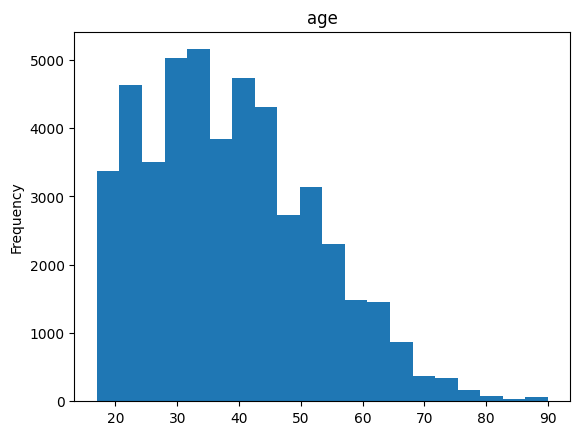

In [53]:
df['age'].plot(kind='hist', bins=20, title='age')
plt.show()

# most of our data comes from young-middle aged people

<Axes: ylabel='education'>

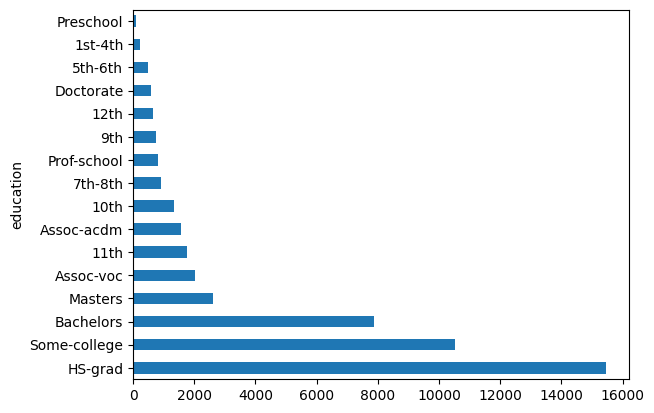

In [54]:
df['education'].value_counts().plot(kind='barh')

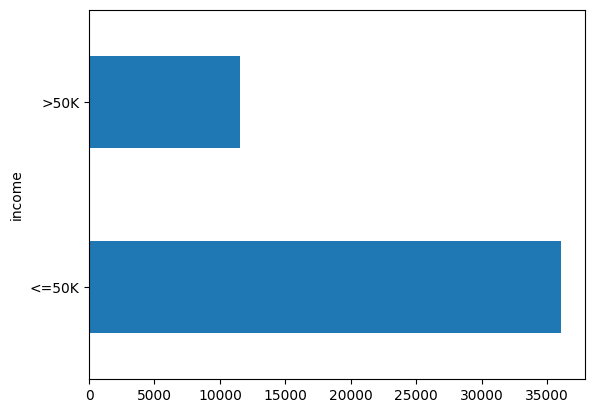

In [55]:
df['income'].value_counts().plot(kind='barh')
plt.show()

# there are a lot more people earning less than 50k in our dataset than more than 50k

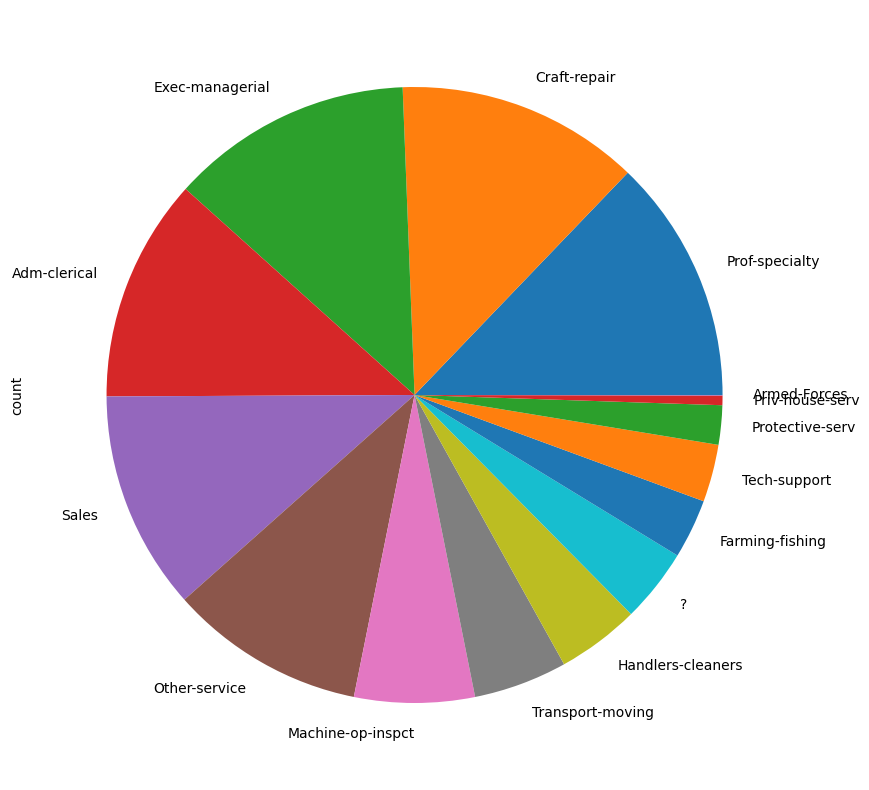

In [56]:
# take a look at occupations
occupation_counts = df['occupation'].value_counts()

plt.figure(figsize=(10, 10))
occupation_counts.plot(kind='pie')
plt.show()

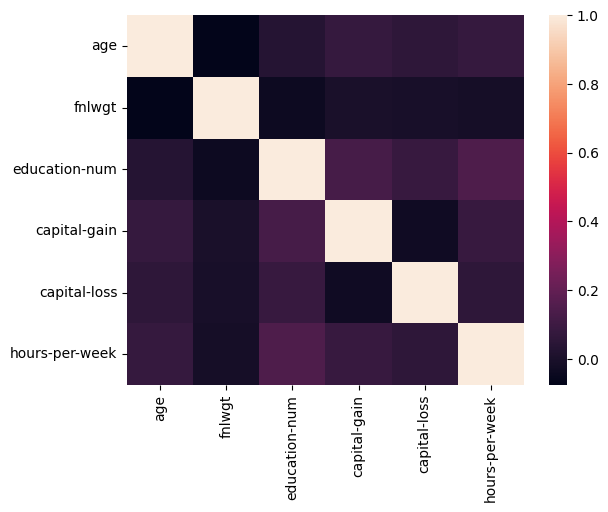

In [57]:
# correlation heatmap on numerical cols
corrs = df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'], axis=1)
sns.heatmap(corrs.corr())
plt.show()


# 3. Hypothesis Formulation:

# a. Higher levels of education lead to higher income



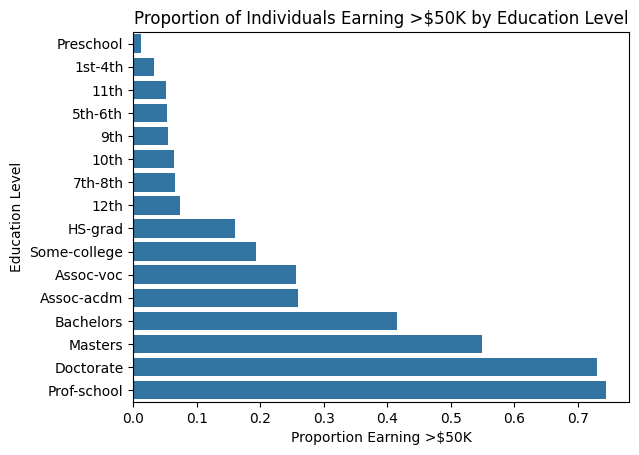

In [59]:
# encode categorical var
df['income_binary'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# group by education and calculate the mean of the binary income
education_income = df.groupby('education')['income_binary'].mean().sort_values()

# plot in seaborn
sns.barplot(x=education_income.values, y=education_income.index)
plt.xlabel('Proportion Earning >$50K')
plt.ylabel('Education Level')
plt.title('Proportion of Individuals Earning >$50K by Education Level')
plt.show()

The visualization does indeed show a clear trend that as the educational level increases, so does the proportion of individuals earning more than $50K. Notice that the "top 3 earners" are all holders of some kind of graduate degree, whether it be a masters, doctorate, or professional degree, whereas the bottom contains grade school to high school education levels.

# b. Race affects income levels
- minorities vs non-minorities

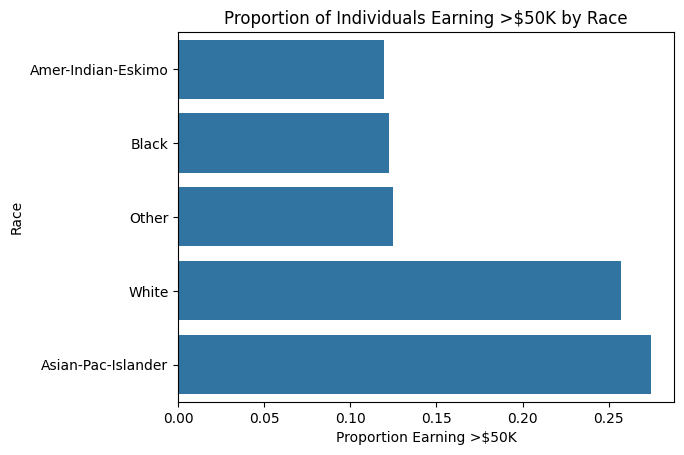

In [60]:
# Group by race and calculate the mean of the binary income
race_income = df.groupby('race')['income_binary'].mean().sort_values()


sns.barplot(x=race_income.values, y=race_income.index)
plt.xlabel('Proportion Earning >$50K')
plt.ylabel('Race')
plt.title('Proportion of Individuals Earning >$50K by Race')
plt.show()

The "Asian-Pac-Islander" group has the highest proportion of individuals earning over $50K, immediately followed by the "White" racial group. The other three categories, which I will generalize as "minorities", show a lower proportion. This supports our hypothesis that says there are disparities in income among different racial groups.



# c. The proportion of white males earning more than $50K is higher than any other race and gender combination

In [61]:
# grouping by race and sex, find proportion for each combination of race-sex
race_sex_income = df.groupby(['race', 'sex'])['income_binary'].mean()

race_sex_income_df = race_sex_income.reset_index()
race_sex_income_df.columns = ['Race', 'Sex', 'Proportion Earning >$50K']


# using plotly just cuz
fig = px.bar(race_sex_income_df, x='Proportion Earning >$50K', y='Race',
             color='Sex', barmode='group',
             title='Proportion of Individuals Earning >$50K by Race and Sex',
             labels={'Proportion Earning >$50K': 'Proportion Earning >$50K', 'Race': 'Race'},
             height=600, width=800)


fig.show()

Within every racial group, males have a higher proportion of individuals earning over $50K than females, indicating a gender income gap across all races.

Among females, "Asian-Pac-Islander" also appears to have the highest proportion of individuals earning over $50K, with "White" females following.

"Amer-Indian-Eskimo" and "Other" groups have the lowest proportions of high earners, both among males and females.

The chart partially supports our hypothesis by showing that "White" males have a high proportion of individuals earning over $50K, but it is the "Asian-Pac-Islander" male group that shows the highest proportion.

# 4. Conclusion

Education: Higher education is associated with increased income potential. This highlights the importance of educational opportunities and the potential return on investment in higher education.

Gender Disparity: A consistent gender income gap is observed across all racial groups, showing the need for policies addressing wage equality and highlights the importance of further research into the structural causes of these disparities.

Racial Income Disparity: Race and sex together influence income levels, with significant variations in earnings among different racial groups.
